# Identificando Pokemons com modelos de Machine Learning

## Importando algumas bibliotecas para o processamento

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Pegando todos os nomes das fotos que estão salvas na pasta "pokemons"

In [2]:
lista = os.listdir('C:/Users/joaovitor/Desktop/Python/pokemons')
print(lista, end='')

['bulbassauro_1.jpg', 'bulbassauro_10.jpg', 'bulbassauro_11.jpg', 'bulbassauro_12.jpg', 'bulbassauro_13.jpg', 'bulbassauro_14.png', 'bulbassauro_15.jpg', 'bulbassauro_16.jpg', 'bulbassauro_2.jpg', 'bulbassauro_3.png', 'bulbassauro_4.jpg', 'bulbassauro_5.jpg', 'bulbassauro_6.jpg', 'bulbassauro_7.jpg', 'bulbassauro_8.png', 'bulbassauro_9.jpg', 'pikachu_1.png', 'pikachu_10.png', 'pikachu_11.png', 'pikachu_12.jpg', 'pikachu_13.jpg', 'pikachu_14.jpg', 'pikachu_15.jpg', 'pikachu_16.png', 'pikachu_2.png', 'pikachu_3.png', 'pikachu_4.png', 'pikachu_5.jpg', 'pikachu_6.jpg', 'pikachu_7.png', 'pikachu_8.png', 'pikachu_9.jpg']

## Adicionando as fotos dentro de uma lista chamada fotos

In [3]:
fotos = []
for c in lista:
    img = cv2.imread(f'C:/Users/joaovitor/Desktop/Python/pokemons/{c}')
    fotos.append(img)
print(20*'=')
print('Total de fotos:',len(fotos))
print(20*'=')

Total de fotos: 32


## Visualizando alguns pokemons

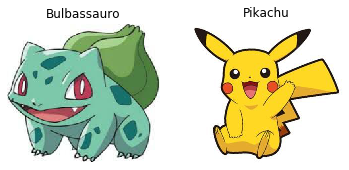

In [4]:
RGB_im = cv2.cvtColor(fotos[0], cv2.COLOR_BGR2RGB)
RGB_im2 = cv2.cvtColor(fotos[31], cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(RGB_im), plt.axis(False), plt.title('Bulbassauro')
plt.subplot(122), plt.imshow(RGB_im2), plt.title('Pikachu')
plt.axis(False)
plt.show()

## Precisamos redimensionar todas as fotos para o mesmo tamanho

In [5]:
fotos_redimensionadas = []
for x in fotos:
    fotos_redimensionadas.append(cv2.resize(x, (30,30)))

print(27*'=')
print('Nova dimensão:',fotos_redimensionadas[0].shape)
print(27*'=')

Nova dimensão: (30, 30, 3)


## Visualizando o resultado do redimensionamento

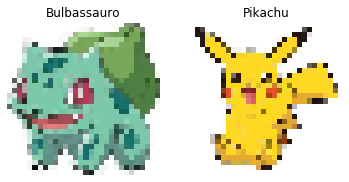

In [6]:
RGB_im = cv2.cvtColor(fotos_redimensionadas[0], cv2.COLOR_BGR2RGB)
RGB_im2 = cv2.cvtColor(fotos_redimensionadas[31], cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(RGB_im), plt.axis(False), plt.title('Bulbassauro')
plt.subplot(122), plt.imshow(RGB_im2), plt.title('Pikachu')
plt.axis(False)
plt.show()

## Concatenando todas as imagens em uma única matriz 
### O X será o nosso conjunto de variáveis independentes ou preditoras

In [7]:
X = np.concatenate((fotos_redimensionadas), axis=0)
print(33*'=')
print('Dimensão da matriz:', X.shape)
print(33*'=')

Dimensão da matriz: (960, 30, 3)


## Rotulando todas as imagens com os nomes de seus respectivos pokemons
### 0 = Bulbassauro, 1= Pikachu

In [8]:
#Pegando o index do último bulbassauro da lista
#Ou seja, de 0 a 15(14 no python) estão as fotos do bulbassauro, e de 15 até o final do pikachu.
y = [0 for c in range(0,15)]
for c in range(15, len(lista)):
    y.append(1)
y = np.array(y)
y = np.reshape(y, (-1,1))

## Como podemos ver, os arrays X e y são incompatíveis, devemos redimensionar X 

In [9]:
print(21*'=')
print('X shape:',X.shape)
print('y shape:',y.shape)
print(21*'=')

X shape: (960, 30, 3)
y shape: (32, 1)


## Transformando X em uma matriz, onde cada linha é uma imagem 

In [10]:
X = X.reshape(len(y),-1)
print(21*'=')
print('X shape:',X.shape)
print(21*'=')

X shape: (32, 2700)


## Unindo X com y e transformando em um Dataframe

In [11]:
dados = np.concatenate((X,y), axis=1)
dados = pd.DataFrame(dados)
dados.head()

,0,1,2,3,4,5,6,7,8,9,...,2691,2692,2693,2694,2695,2696,2697,2698,2699,2700
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,48,72,41,59,89,46,59,96,50,49,...,179,221,93,174,226,94,164,150,32,0
2,187,109,60,101,63,46,171,104,60,185,...,29,79,121,28,80,121,28,78,121,0
3,59,97,26,61,108,29,76,113,48,66,...,45,196,129,46,188,125,32,149,91,0
4,188,181,145,91,176,70,227,250,163,153,...,73,159,81,61,137,70,114,173,110,0


## Dividindo os dados em X e y novamente

In [12]:
X = dados.iloc[:, :-1].values
y = dados.iloc[:, -1].values

## Dividindo os dados em conjuntos de treino e teste

In [13]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

## Treinando o Modelo de SVM linear e avaliando o score

In [14]:
from sklearn.svm import SVC
classificador_lin = SVC(kernel='linear')
classificador_lin.fit(Xtrain,ytrain)
y_pred = classificador_lin.predict(Xtest)
score = classificador_lin.score(X,y)

print('y_test:', ytest)
print('y_pred', y_pred)
print('Score:', score)

y_test: [1 1 0 0 1 1 1]
y_pred [1 1 0 0 1 1 1]
Score: 1.0


## Plotando os resultados em imagens
## 0 = Bulbassauro,  1=Pikachu

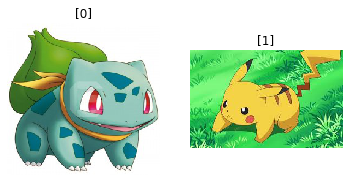

In [15]:
b=13
p=22

RGB_im = cv2.cvtColor(fotos[b], cv2.COLOR_BGR2RGB)
RGB_im2 = cv2.cvtColor(fotos[p], cv2.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(RGB_im), plt.axis(False), plt.title(f'{classificador_lin.predict(np.reshape(X[b],(1,-1)))}')
plt.subplot(122), plt.imshow(RGB_im2), plt.title(f'{classificador_lin.predict(np.reshape(X[p],(1,-1)))}')
plt.axis(False)
plt.show()

## Imprimindo a Matriz de Confusão

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, y_pred)
confusion_matrix

array([[2, 0],
       [0, 5]], dtype=int64)